In [1]:
# ----- Importing Required Libraries ----- #

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the loan data in pandas dataframe
# To avoid DtypeWarning: Columns (47) have mixed types. Specify dtype option on import by creating a variable or set low_memory=False.

Data = pd.read_csv('loan.csv', low_memory=False)

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
Data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
Data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# It is observed that many columns have all null values. First removing those columns is the priority.

Data.dropna(axis =1 , how = 'all', inplace = True)

In [7]:
# After dropping columns, checking the shape of dataframe again.

Data.shape

(39717, 57)

In [8]:
Data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [9]:
# Dropping the columns with very high values of null present in them.

Data.drop(['next_pymnt_d','desc','mths_since_last_record','mths_since_last_delinq'], axis=1, inplace=True)

In [10]:
# It is observed that several columns are single valued. They cannot contribute to our analysis. So dropping those columns.

columns_to_drop = ['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','pub_rec_bankruptcies','last_pymnt_d','policy_code','acc_now_delinq', 'application_type', 'tax_liens', 'delinq_amnt']
Data.drop(columns=columns_to_drop, inplace=True)

In [11]:
# Below columns doesn't help in our Analysis. So dropping those columns too.

columns_to_drop = ['chargeoff_within_12_mths','title','url','zip_code','emp_title','last_credit_pull_d']
Data.drop(columns=columns_to_drop, inplace=True)

In [12]:
is_unique = not Data['member_id'].duplicated().any()
is_unique

True

In [13]:
# As we found that member id is also a unique column just like id, hence we removing it as no insights can be used in the analysis from it.

Data.drop(['member_id'], axis=1, inplace=True)

In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [15]:
# To find the columns that have null values & what percent of nulls are present .

null_columns = Data.columns[Data.isnull().any()]
null_data = Data[null_columns].isnull().sum().to_frame(name='Null Count')\
          .merge(Data[null_columns].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)
print(null_data)

            Null Count  Null Percent
emp_length        1075      2.706650
revol_util          50      0.125891


In [16]:
# Removal of extra characters in term

Data['term'] = Data['term'].str.replace('months', '')
Data['term'] = Data['term'].astype(int)

In [17]:
# Removal of extra characters in int_rate & revol_util

Data['revol_util'] = Data['revol_util'].str.rstrip('%')
Data['revol_util'] = Data['revol_util'].astype(float)
Data['int_rate'] = Data['int_rate'].str.rstrip('%')
Data['int_rate'] = Data['int_rate'].astype(float)

In [18]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  int32  
 5   int_rate                 39717 non-null  float64
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [19]:
# As issue_d is in object data type so coverting it into date data type.

from datetime import datetime
def convert_date(date_str):
    date_obj = datetime.strptime(date_str, '%b-%y')
    formatted_date = date_obj.strftime('%b - %Y')
    return formatted_date

Data['issue_d'] = Data['issue_d'].apply(convert_date)
Data['issue_d'] = pd.to_datetime(Data['issue_d'], format='%b - %Y')

In [20]:
Data['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [21]:
column_category=Data.select_dtypes(include=['object']).columns
print(column_category)

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'earliest_cr_line'],
      dtype='object')


In [22]:
column_numerical = Data.select_dtypes(include=np.number).columns.tolist()
print(column_numerical)

['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']


In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   loan_amnt                39717 non-null  int64         
 2   funded_amnt              39717 non-null  int64         
 3   funded_amnt_inv          39717 non-null  float64       
 4   term                     39717 non-null  int32         
 5   int_rate                 39717 non-null  float64       
 6   installment              39717 non-null  float64       
 7   grade                    39717 non-null  object        
 8   sub_grade                39717 non-null  object        
 9   emp_length               38642 non-null  object        
 10  home_ownership           39717 non-null  object        
 11  annual_inc               39717 non-null  float64       
 12  verification_status      39717 n

In [24]:
# Filling the missing value using mode.

Data['emp_length'] = Data['emp_length'].fillna(Data['emp_length'].mode()[0])
distinct_entries = pd.Series(Data['emp_length'].value_counts()).sort_values(ascending=False)
print(distinct_entries)

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [25]:
 # In our analysis we will consider 10 as 10+ years & we will consider 0 as less than a year. Also coverting it into int as data type

Data['emp_length'] = Data['emp_length'].str.replace('years', '', regex=True)
Data['emp_length'] = Data['emp_length'].str.replace('year', '', regex=True)
Data['emp_length'] = Data['emp_length'].str.replace('+', '', regex=True)    
Data['emp_length'] = Data['emp_length'].str.replace('< 1', '0', regex=True) 
Data['emp_length'] = Data['emp_length'].astype(int)

In [26]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   loan_amnt                39717 non-null  int64         
 2   funded_amnt              39717 non-null  int64         
 3   funded_amnt_inv          39717 non-null  float64       
 4   term                     39717 non-null  int32         
 5   int_rate                 39717 non-null  float64       
 6   installment              39717 non-null  float64       
 7   grade                    39717 non-null  object        
 8   sub_grade                39717 non-null  object        
 9   emp_length               39717 non-null  int32         
 10  home_ownership           39717 non-null  object        
 11  annual_inc               39717 non-null  float64       
 12  verification_status      39717 n

In [27]:
# Finally we are going to drop all the rows that contain null values

Data.dropna(inplace=True)

In [28]:
Data.shape

(39667, 36)

In [29]:
# To check if there is any column left with null values.

Data.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_rec

In [30]:
# Creating a new data set so we can create our visualizations & analyze the data better.

Data_Loan = Data[['id','issue_d','grade', 'sub_grade', 'emp_length', 'home_ownership','verification_status', 'loan_status', 'purpose', 'addr_state'
               ,'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'annual_inc', 'dti',
               'total_pymnt', 'total_pymnt_inv']]

In [31]:
# Creating 2 new columns as month & date

Data_Loan = Data_Loan.assign(
    month=Data_Loan['issue_d'].dt.strftime('%b'),
    year=Data_Loan['issue_d'].dt.year
)

In [32]:
# Filtering out data where loan status = 'Current'

Data_Loan = Data_Loan[Data_Loan['loan_status'] != 'Current']
Data_Loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [33]:
# Creating another columns which can tell us how much revenue was generated by the bank.

Data_Loan['revenue_generated'] = Data_Loan['total_pymnt'] - Data_Loan['funded_amnt']

In [34]:
Data_Loan.shape

(38527, 22)

In [35]:
# Filtering out data where revenue_generated <=0 and loan_status is Fully Paid as this is not possible.
condition1 = (Data_Loan['revenue_generated'] <= 0) & (Data_Loan['loan_status'] == 'Fully Paid')
df_loan_filtered= Data_Loan[~condition1]


In [36]:
# Filtering out data where revenue_generated >0 and loan_status is Charged Off as this is not possible.
condition2 = (df_loan_filtered['revenue_generated'] > 0) & (df_loan_filtered['loan_status'] == 'Charged Off')
Data_New = df_loan_filtered[~condition2]

In [37]:
Data_New.shape

(37763, 22)

In [38]:
Data_New.head()

,id,issue_d,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,...,funded_amnt_inv,term,int_rate,annual_inc,dti,total_pymnt,total_pymnt_inv,month,year,revenue_generated
0,1077501,2011-12-01,B,B2,10,RENT,Verified,Fully Paid,credit_card,AZ,...,4975.0,36,10.65,24000.0,27.65,5863.155187,5833.84,Dec,2011,863.155187
1,1077430,2011-12-01,C,C4,0,RENT,Source Verified,Charged Off,car,GA,...,2500.0,60,15.27,30000.0,1.00,1008.710000,1008.71,Dec,2011,-1491.290000
2,1077175,2011-12-01,C,C5,10,RENT,Not Verified,Fully Paid,small_business,IL,...,2400.0,36,15.96,12252.0,8.72,3005.666844,3005.67,Dec,2011,605.666844
3,1076863,2011-12-01,C,C1,10,RENT,Source Verified,Fully Paid,other,CA,...,10000.0,36,13.49,49200.0,20.00,12231.890000,12231.89,Dec,2011,2231.890000
5,1075269,2011-12-01,A,A4,3,RENT,Source Verified,Fully Paid,wedding,AZ,...,5000.0,36,7.90,36000.0,11.20,5632.210000,5632.21,Dec,2011,632.210000


In [39]:
Data_New.describe(include='all',datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,37763.0,NaN,NaN,NaN,676353.388528,54734.0,511908.5,656389.0,829147.0,1077501.0,209151.676207
issue_d,37763,NaN,NaN,NaN,2010-10-25 23:37:36.971109376,2007-06-01 00:00:00,2010-05-01 00:00:00,2011-01-01 00:00:00,2011-08-01 00:00:00,2011-12-01 00:00:00,NaN
grade,37763,7,B,11508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,37763,35,A4,2856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,37763.0,NaN,NaN,NaN,5.073829,0.0,2.0,4.0,9.0,10.0,3.601642
home_ownership,37763,5,RENT,18057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
verification_status,37763,3,Not Verified,16389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_status,37763,2,Fully Paid,32916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,37763,14,debt_consolidation,17658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
addr_state,37763,50,CA,6802,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ----------------------------------------------Insights-------------------------------------------------

### 1. The avg. loan amount provided to customers was Rs.11,227.
### 2. The avg. interest rate on loans is 12%, with a min. of 5.42% and a max. of 24.6%.
### 3. The avg. annual income of borrowers is Rs.69,000, with a min. of Rs.4,000 and a max. of    Rs.60,00,000.
### 4. The average DTI of borrowers is 13.32, with a minimum of 0 and a maximum of 30.

Text(0.5, 1.0, 'Distribution of Interest Rate')

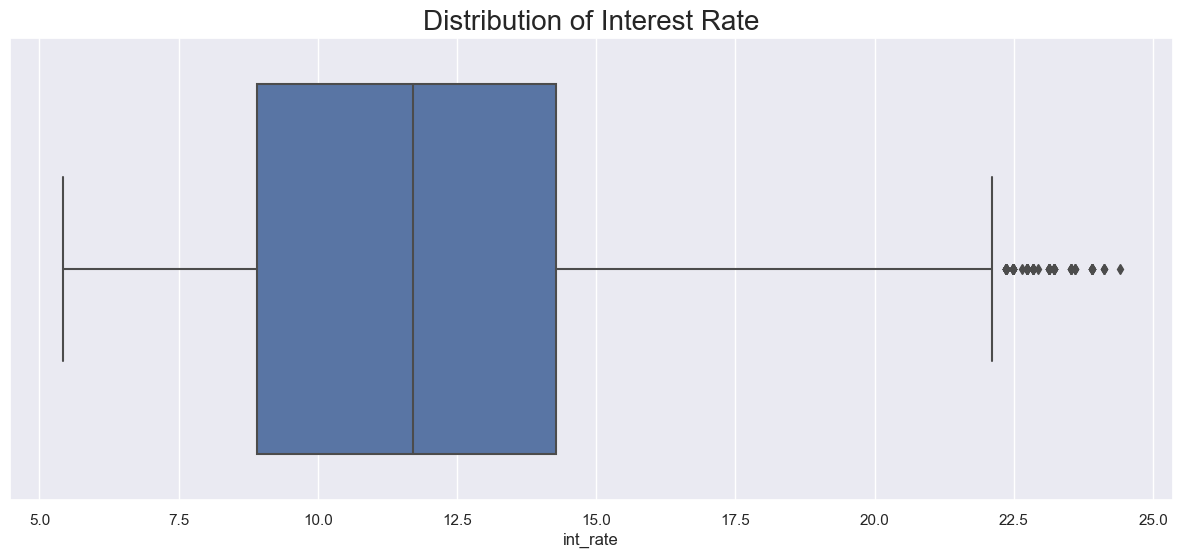

In [40]:
# To check for outlers in INT_RATE

sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='int_rate', data=Data_New)
plt.title('Distribution of Interest Rate',fontsize=20)

In [41]:
#Removing anything which has more value than 22.5 in INT_RATE

Data_New = Data_New[Data_New['int_rate']<=22.5]

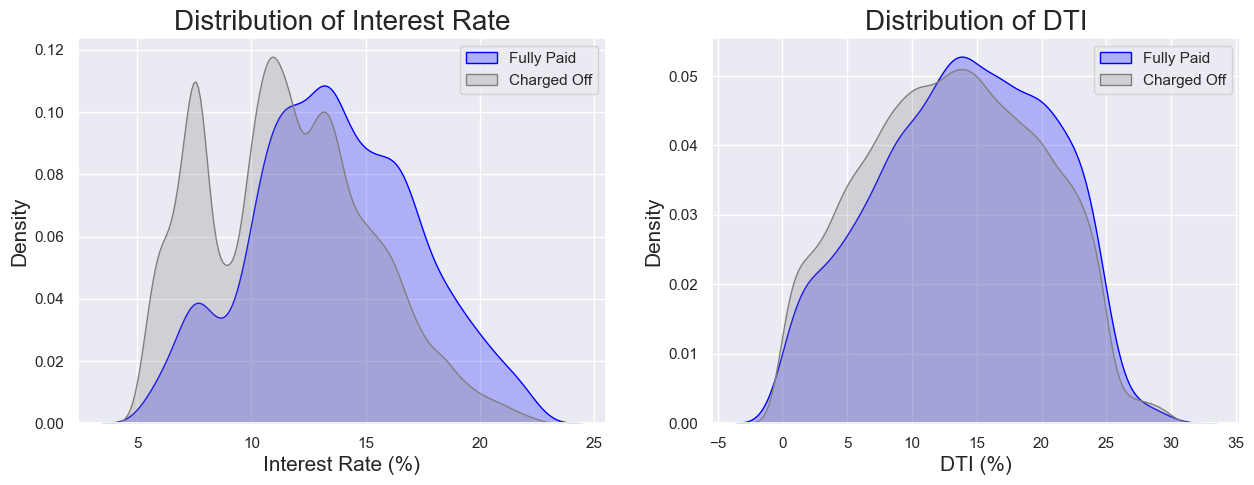

In [42]:
# Creating a comaprision of Fully Paid & Charged Off for Interest Rates & DTI.

sns.set(rc={'figure.figsize':(15,5)})
plt.subplot(1, 2, 1)
sns.kdeplot(Data_New.loc[Data_New['loan_status'] == 'Charged Off', 'int_rate'], label = 'target = 1', color= 'blue',fill=True)
sns.kdeplot(Data_New.loc[Data_New['loan_status'] == 'Fully Paid', 'int_rate'], label = 'target = 0',color= 'grey', fill=True);
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.legend(Data_New['loan_status'])
plt.title('Distribution of Interest Rate',fontsize=20);

plt.subplot(1, 2, 2)
sns.set(rc={'figure.figsize':(15,5)})
sns.kdeplot(Data_New.loc[Data_New['loan_status'] == 'Charged Off', 'dti'], label = 'target = 1',color= 'blue',fill=True)
sns.kdeplot(Data_New.loc[Data_New['loan_status'] == 'Fully Paid', 'dti'], label = 'target = 0',color= 'grey',fill=True);
plt.xlabel('DTI (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.legend(Data_New['loan_status'])
plt.title('Distribution of DTI',fontsize=20);

# ----------------------------------------------Insights-------------------------------------------------

## Fully Paid Loans:
### Interest Rates: The data shows a clear average interest rate of 11% for fully repaid loans.
### Debt-to-Income Ratio (DTI): Fully repaid loans are also associated with an average DTI of 14%. This suggests   borrowers with moderate debt obligations were able to successfully repay their loans at this interest rate.
## Charged Off Loans:
### Interest Rates and DTI: Interestingly, charged-off loans (loans deemed uncollectible) also exhibit an average interest rate and DTI of 14% each. This unexpected similarity warrants further investigation to understand why these borrowers defaulted despite having seemingly similar profiles to those who fully repaid their loans.


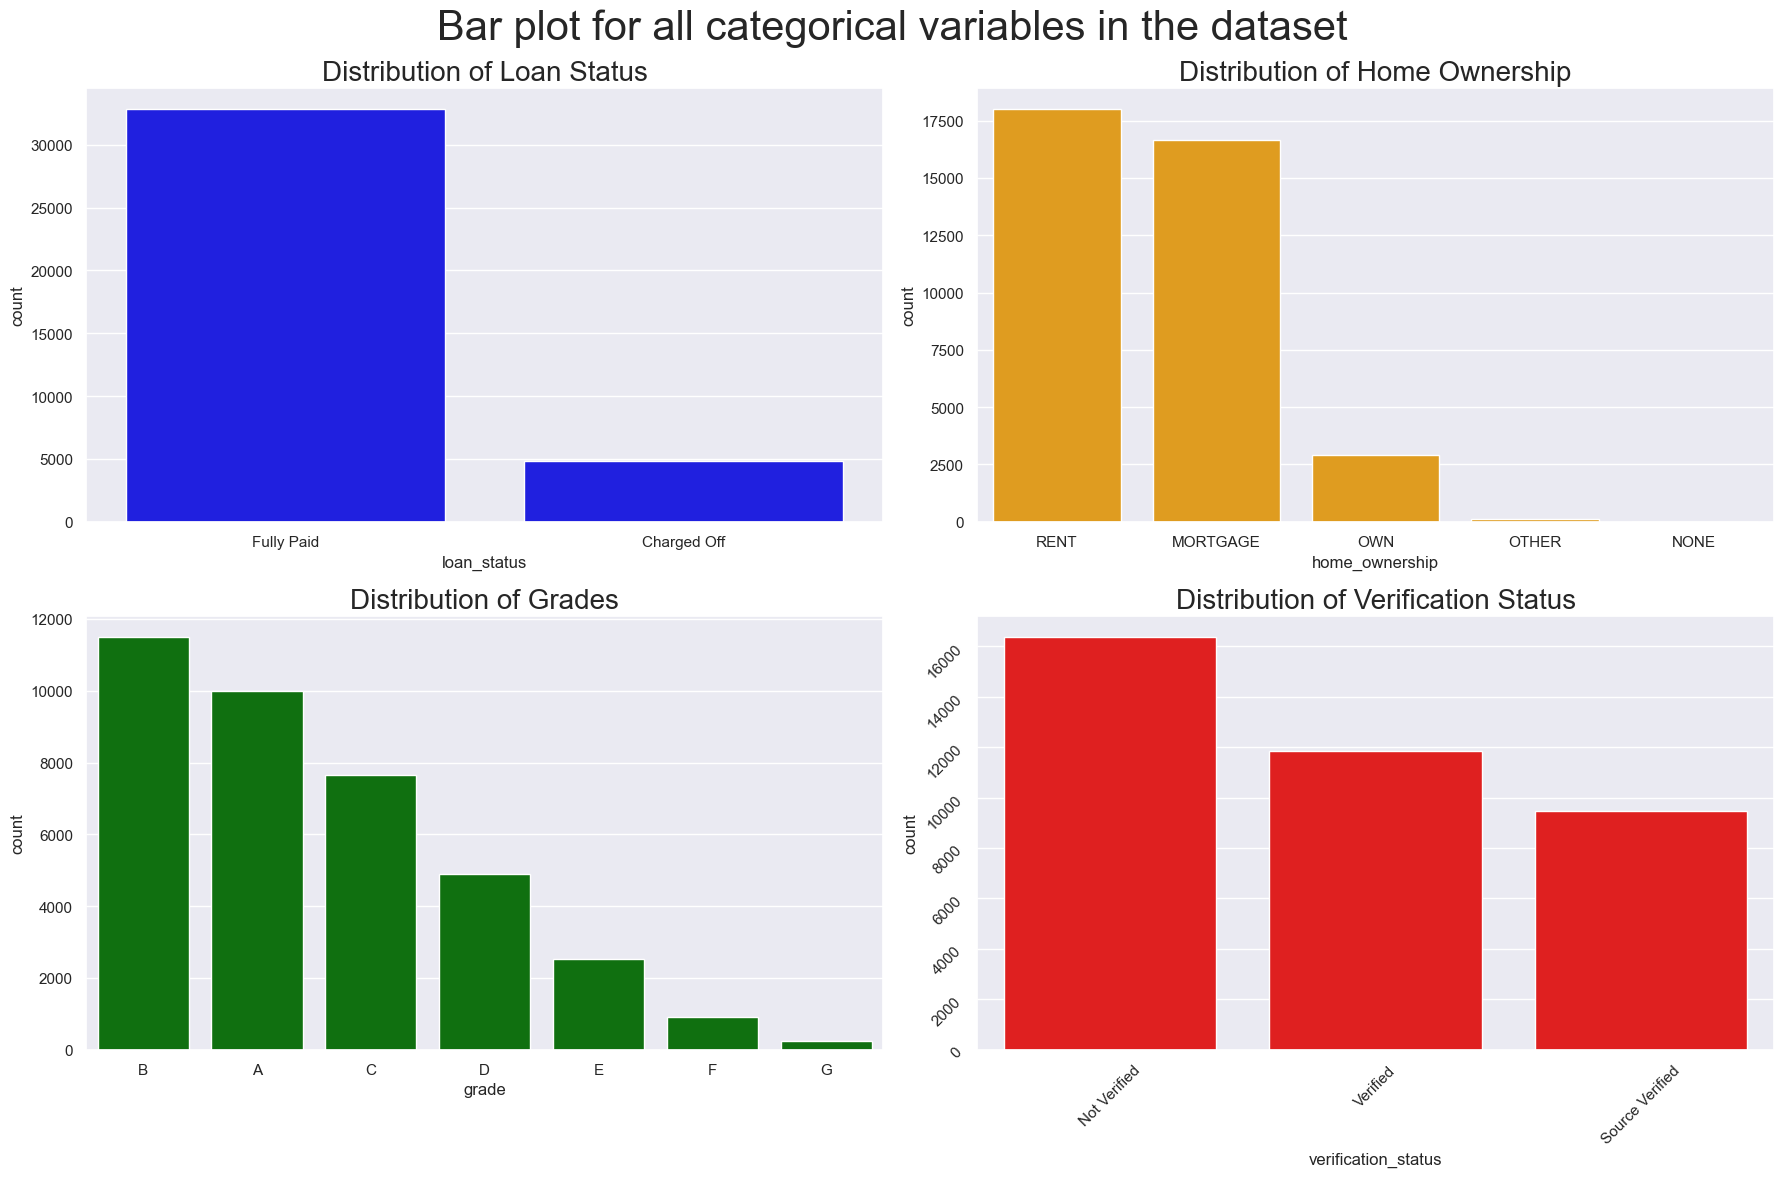

In [43]:
# Creating different plots to present bivarative analysis.

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Bar plot for all categorical variables in the dataset', fontsize=30)
sns.countplot(ax=axes[0, 0], x='loan_status', data=Data_New, color='blue', 
              order=Data_New['loan_status'].value_counts().index)
axes[0, 0].set_title('Distribution of Loan Status', fontsize=20)  
sns.countplot(ax=axes[0, 1], x='home_ownership', data=Data_New, color='orange', 
              order=Data_New['home_ownership'].value_counts().index[:5])
axes[0, 1].set_title('Distribution of Home Ownership', fontsize=20) 
sns.countplot(ax=axes[1, 0], x='grade', data=Data_New, color='green', 
              order=Data_New['grade'].value_counts().index[:20])
axes[1, 0].set_title('Distribution of Grades', fontsize=20)  
sns.countplot(ax=axes[1, 1], x='verification_status', data=Data_New, color='red', 
              order=Data_New['verification_status'].value_counts().index)
axes[1, 1].set_title('Distribution of Verification Status', fontsize=20)
axes[1, 1].tick_params(labelrotation=45)
plt.tight_layout()
plt.show()

# ----------------------------------------------Insights-------------------------------------------------

### 1. The data shows a strong repayment record, with a significant majority (around 85-90%) of customers successfully repaying their loans in full.
### 2. A default rate of approximately 1 in 7 (14-15%) indicates a manageable level of risk.
### 3. The data suggests the loans cater to a customer segment that primarily living in a rented house. This could be valuable for targeting marketing efforts.Most of the loan takers were not verified.
### 4. The fact that most loan takers were not verified highlights a potential area for improvement in risk management.
### 5. The dominance of Grade A and B loans indicates the bank prioritizes lending to creditworthy borrowers with a lower risk of default.


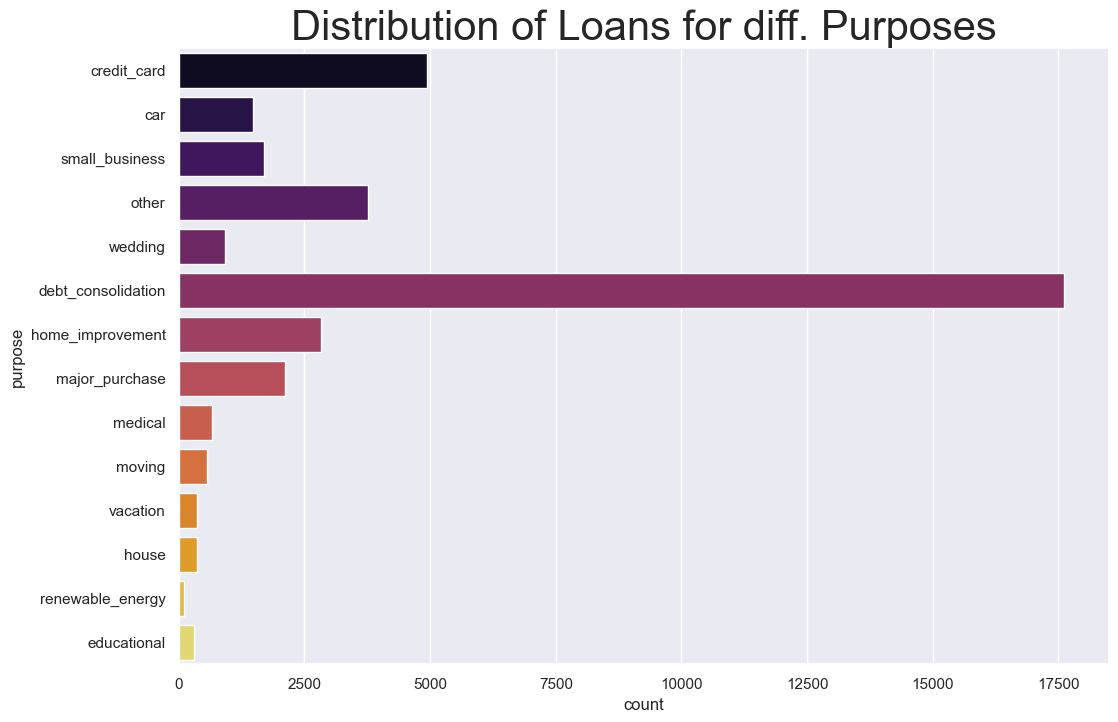

In [44]:
# Creating a barplot to present Distribution of Loans for diff. Purposes.

fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y ='purpose', data=Data_New,palette='inferno')
plt.title("Distribution of Loans for diff. Purposes", fontsize=30)
plt.show()

# ----------------------------------------------Insights-------------------------------------------------

### Loans are Utilized for Debt Consolidation by a majority of Borrowers.

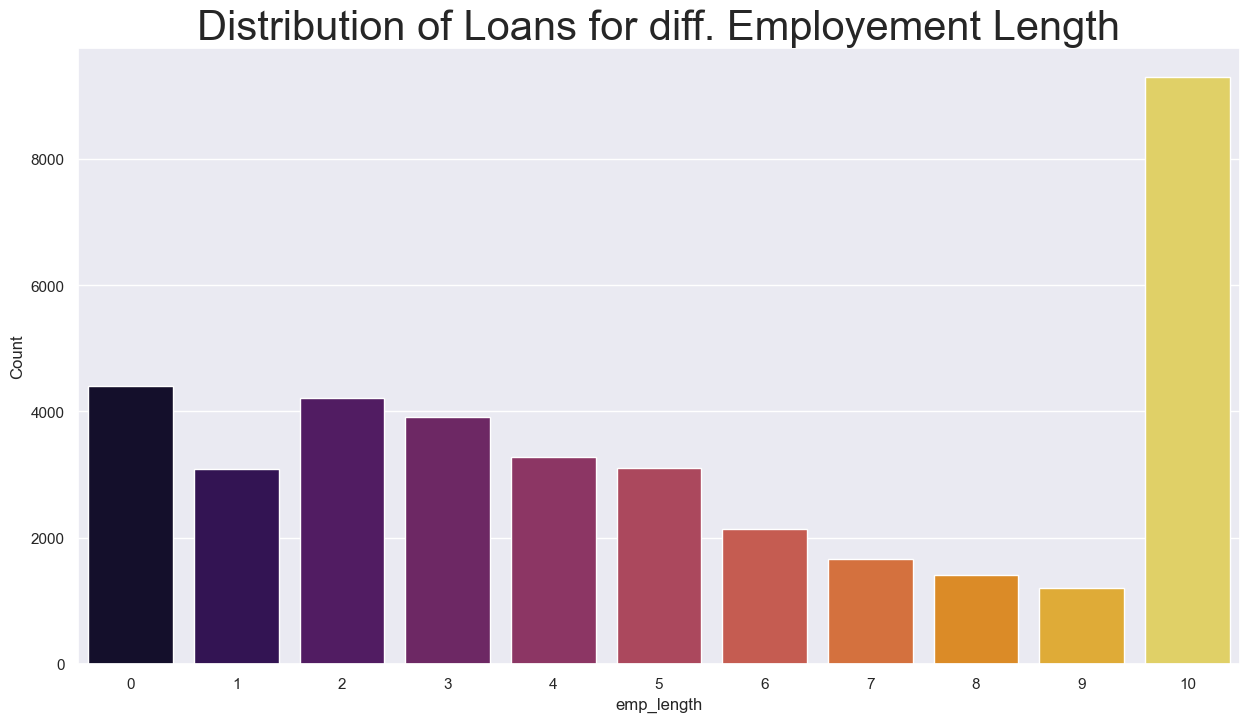

In [45]:
# Creating a barplot to present Distribution of Loans for diff. Employement Length(Experience).

sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x='emp_length', data=Data_New,palette='inferno')
plt.xlabel('emp_length')
plt.ylabel("Count")
plt.title("Distribution of Loans for diff. Employement Length", fontsize=30)
plt.show()

# ----------------------------------------------Insights-------------------------------------------------

### 1. The data shows a preference for lending to experienced borrowers (10+ years of employment) who likely represent a lower risk profile.
### 2. The presence of a significant number of inexperienced/fresh borrowers suggests the bank is open to attracting a new customer segment. This could be a potential growth area.

<Axes: xlabel='grade', ylabel='count'>

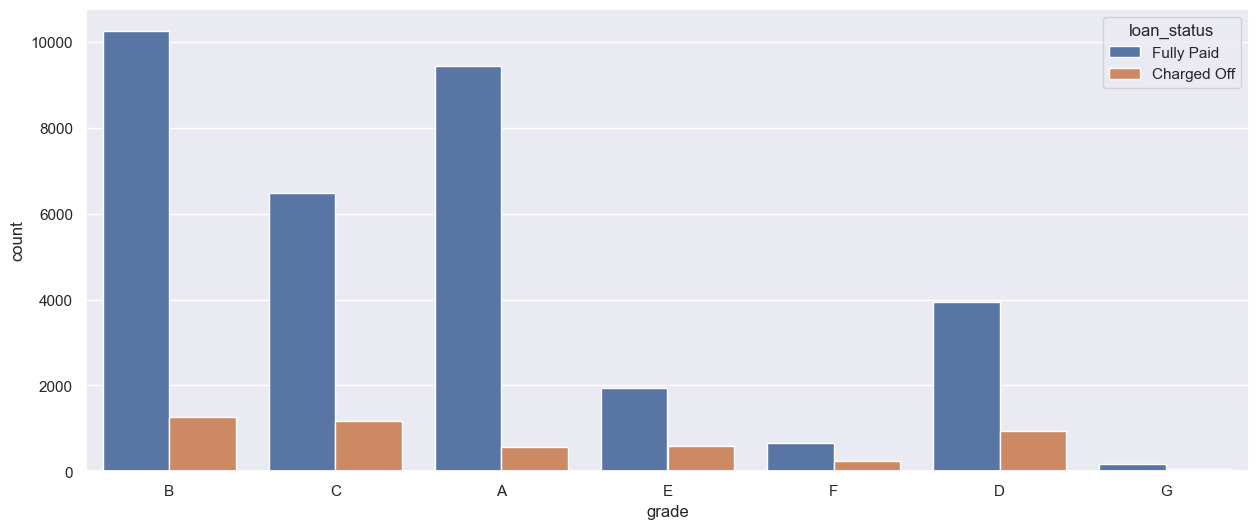

In [46]:
# Checking how Fully Paid & Charged Off are doing in each Gardes.

sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='grade', hue='loan_status', data=Data_New)

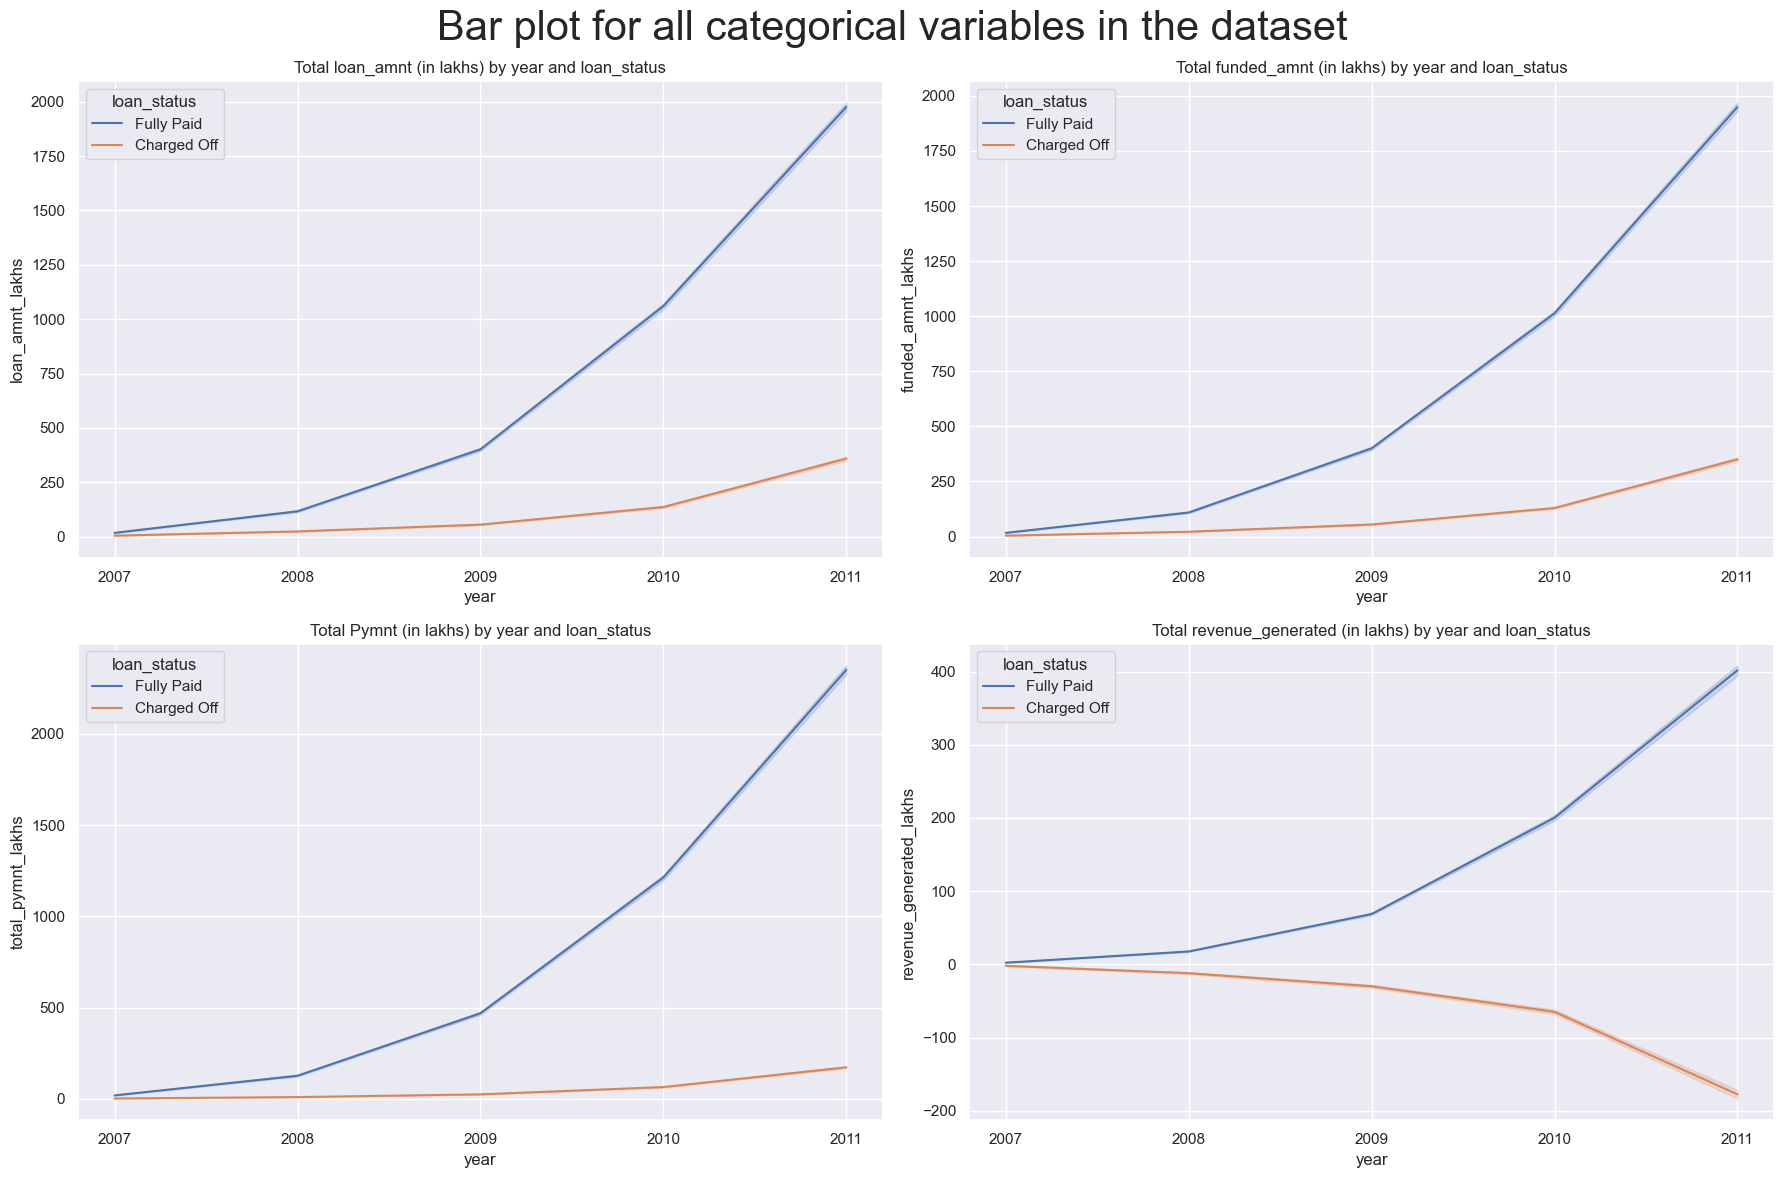

In [47]:
# Creating lineplots for Total Loan applied, Total Funded, Total Payment, Total Revenue Generated over the period of Years.

from matplotlib.ticker import MultipleLocator
Data_New['loan_amnt_lakhs'] = Data_New['loan_amnt'] / 100000
Data_New['funded_amnt_lakhs'] = Data_New['funded_amnt'] / 100000
Data_New['total_pymnt_lakhs'] = Data_New['total_pymnt'] / 100000
Data_New['revenue_generated_lakhs'] = Data_New['revenue_generated'] / 100000
Data_New['year'] = pd.to_numeric(Data_New['year'], errors='coerce')

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Bar plot for all categorical variables in the dataset', fontsize=30)
# Plot for 'loan_amnt' in the first subplot (top-left)
sns.lineplot(ax=axes[0, 0], data=Data_New, x='year', y='loan_amnt_lakhs', hue='loan_status', estimator=sum)
axes[0, 0].set_title('Total loan_amnt (in lakhs) by year and loan_status')
axes[0, 0].xaxis.set_major_locator(MultipleLocator(1))

# Plot for 'funded_amnt' in the first subplot (top-left)
sns.lineplot(ax=axes[0, 1], data=Data_New, x='year', y='funded_amnt_lakhs', hue='loan_status', estimator=sum)
axes[0, 1].set_title('Total funded_amnt (in lakhs) by year and loan_status')
axes[0, 1].xaxis.set_major_locator(MultipleLocator(1))

# Plot for 'total_pymnt' in the second subplot (top-right)
sns.lineplot(ax=axes[1, 0], data=Data_New, x='year', y='total_pymnt_lakhs', hue='loan_status', estimator=sum)
axes[1, 0].set_title('Total Pymnt (in lakhs) by year and loan_status')
axes[1, 0].xaxis.set_major_locator(MultipleLocator(1))

# Plot for 'revenue_generated' in the third subplot (bottom-left)
sns.lineplot(ax=axes[1, 1], data=Data_New, x='year', y='revenue_generated_lakhs', hue='loan_status', estimator=sum)
axes[1, 1].set_title('Total revenue_generated (in lakhs) by year and loan_status')
axes[1, 1].xaxis.set_major_locator(MultipleLocator(1)) 

plt.tight_layout()
plt.show()


# ----------------------------------------------Insights-------------------------------------------------

### 1. The bank's revenue is increasing year-on-year, but so are the loan amounts that are not being fully repaid (non-performing loans). This suggests a potential need to balance growth with risk management.
### 2. In 2011, borrowers who fully repaid their loans generated interest revenue of approximately 400 lakhs for the bank. This suggests a healthy level of interest income from performing loans. 
### 3. Charged-Off Loans: In 2011, borrowers who were charged off (loans deemed uncollectible) were able to repay approximately 200 lakhs, resulting in a net loss of around 180 lakhs. This translates to a default rate of approximately 47% (180 lakhs loss / 380 lakhs total loan amount).


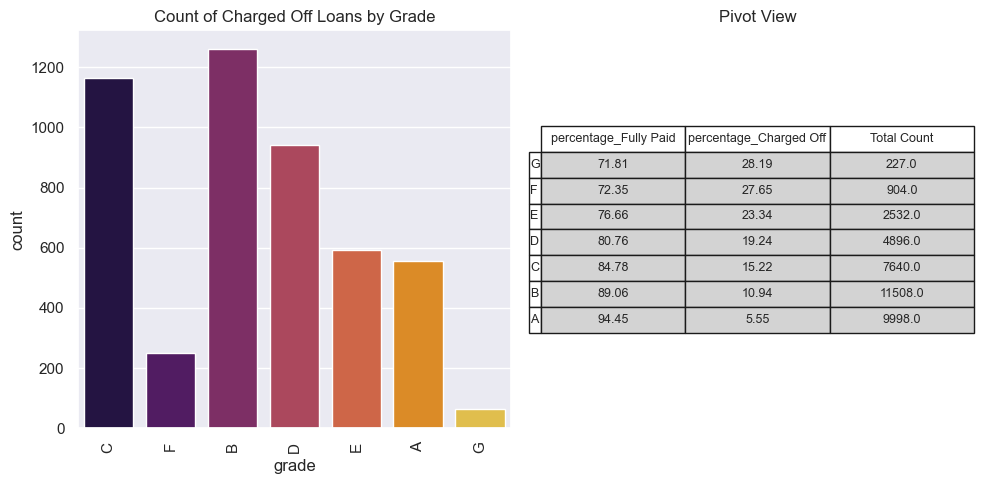

In [48]:
# Creating a visual that represnts the total counts of Charged Off in each Grades.
# Creating a pivot specially to check what percent of charged off are in each Grades & sorting it in descending order.

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='grade', data=Data_New[Data_New['loan_status'] == 'Charged Off'], palette='inferno')
plt.title('Count of Charged Off Loans by Grade')
plt.xticks(rotation=90)

grouped_data = Data_New.groupby(['grade', 'loan_status']).size().reset_index(name='count')
total_counts = grouped_data.groupby('grade')['count'].sum().reset_index(name='total')
merged_data = pd.merge(grouped_data, total_counts, on='grade')
merged_data['percentage'] = (merged_data['count'] / merged_data['total']) * 100
result = merged_data.pivot(index='grade', columns='loan_status', values=['count', 'percentage']).fillna(0)
result.columns = ['_'.join(col).strip() for col in result.columns.values]
result['Total Count'] = result['count_Fully Paid'] + result['count_Charged Off']
pivot_table = result.pivot_table(index='grade',
                                 values=['percentage_Fully Paid', 'percentage_Charged Off', 'Total Count'],
                                 aggfunc='first')
pivot_table['percentage_Fully Paid'] = pivot_table['percentage_Fully Paid'].apply(lambda x: round(x, 2))
pivot_table['percentage_Charged Off'] = pivot_table['percentage_Charged Off'].apply(lambda x: round(x, 2))
pivot_table_sorted = pivot_table.sort_values(by='percentage_Charged Off', ascending=False)
pivot_table_sorted = pivot_table_sorted[['percentage_Fully Paid', 'percentage_Charged Off', 'Total Count']]
plt.subplot(1, 2,2)
plt.title('Pivot View')
plt.axis('off')  
table = plt.table(cellText=pivot_table_sorted.values,
                  colLabels=pivot_table_sorted.columns,
                  rowLabels=pivot_table_sorted.index,
                  cellLoc='center',  
                  loc='center',
                  cellColours=[['lightgrey']*len(pivot_table_sorted.columns)]*len(pivot_table_sorted.index))

table.auto_set_font_size(False)
table.set_fontsize(9)  
table.scale(1, 1.5) 

plt.tight_layout()
plt.show()

# ----------------------------------------------Insights-------------------------------------------------

## Charged Off:
### 1. While a visual analysis suggests Grade B has the most loan defaults, followed by Grade C, a deeper dive reveals a different story.
### 2. Grade G borrowers have the highest percentage of defaults at 28% compared to the total loans issued in that grade. Similarly, Grade F has a high default percentage of 27%.
### 3. Grade A loans show the best performance with only 5.5% of borrowers defaulting on a total of approximately 10,000 loans issued.
### 4. Grade B loans have a higher default rate of 10% compared to Grade A, with a total of roughly 11,500 loans issued.


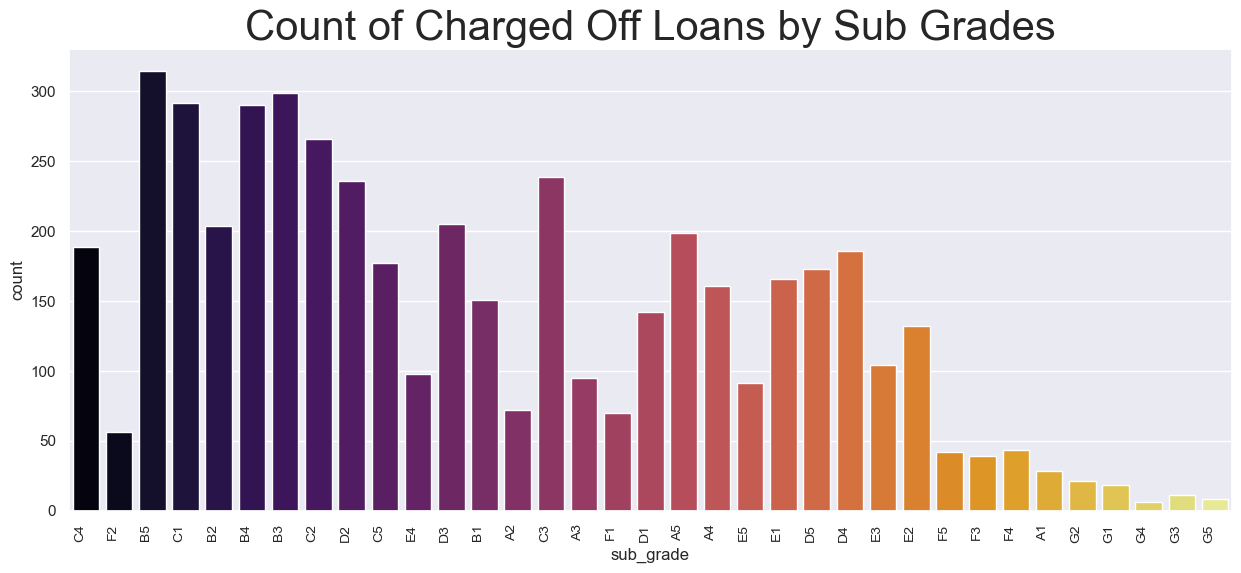

In [49]:
# Creating a visual that represnts the total counts of Charged Off in each Sub-Grades.

sns.countplot(x='sub_grade', data=Data_New[Data_New['loan_status']=='Charged Off'],palette='inferno')
plt.title('Count of Charged Off Loans by Sub Grades', fontsize=30)
plt.xticks(rotation=90, fontsize=10, ha='right')
plt.show()

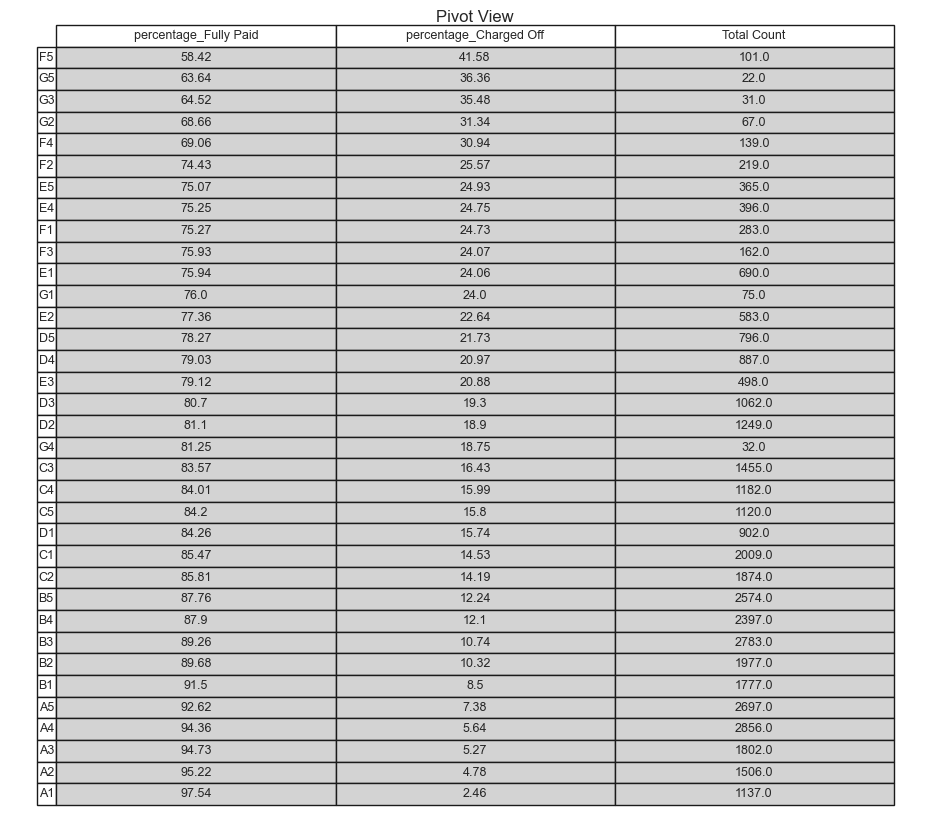

In [50]:
# Creating a pivot specially to check what percent of charged off are in each Grades & sorting it in descending order.

grouped_data = Data_New.groupby(['sub_grade', 'loan_status']).size().reset_index(name='count')
total_counts = grouped_data.groupby('sub_grade')['count'].sum().reset_index(name='total')
merged_data = pd.merge(grouped_data, total_counts, on='sub_grade')
merged_data['percentage'] = (merged_data['count'] / merged_data['total']) * 100
result = merged_data.pivot(index='sub_grade', columns='loan_status', values=['count', 'percentage']).fillna(0)
result.columns = ['_'.join(col).strip() for col in result.columns.values]
result['Total Count'] = result['count_Fully Paid'] + result['count_Charged Off']
pivot_table = result.pivot_table(index='sub_grade',
                                 values=['percentage_Fully Paid', 'percentage_Charged Off', 'Total Count'],
                                 aggfunc='first')
pivot_table['percentage_Fully Paid'] = pivot_table['percentage_Fully Paid'].apply(lambda x: round(x, 2))
pivot_table['percentage_Charged Off'] = pivot_table['percentage_Charged Off'].apply(lambda x: round(x, 2))
pivot_table_sorted = pivot_table.sort_values(by='percentage_Charged Off', ascending=False)
pivot_table_sorted = pivot_table_sorted[['percentage_Fully Paid', 'percentage_Charged Off', 'Total Count']]
plt.figure(figsize=(12, 10))
plt.title('Pivot View')
plt.axis('off')  # Hide axis for cleaner display
table = plt.table(cellText=pivot_table_sorted.values,
                  colLabels=pivot_table_sorted.columns,
                  rowLabels=pivot_table_sorted.index,
                  cellLoc='center',  # Center-align text in cells
                  loc='center',
                  cellColours=[['lightgrey']*len(pivot_table_sorted.columns)]*len(pivot_table_sorted.index))

table.auto_set_font_size(False)
table.set_fontsize(9)  # Adjust font size
table.scale(0.9, 1.3)

# ----------------------------------------------Insights-------------------------------------------------

## Charged Off:
### 1. While a visual analysis suggests Sub Grade B5 has the most loan defaults, followed by Sub Grade B3 & B4, a deeper dive reveals a different story.
### 2. Sub Grade F5 borrowers have the highest percentage of defaults at 41.5% compared to the total loans issued in that sub grade. Similarly, Sub Grade G5 & G3 has a high default percentage of 36% & 35%.
### 3. Sub Grade A1 loans show the best performance with only 2.5% of borrowers defaulting on a total of 1137 loans issued.
### 4. Sub Grade A2,  A3,  A4 &  A5  loans have a higher default rate of 4.78%, 5.27%, 5.64% & 7.38% compared to Sub Grade A1, with a total of roughly 1500, 1800, 2850 & 2697 loans issued. But they still outperform other Sub Grades


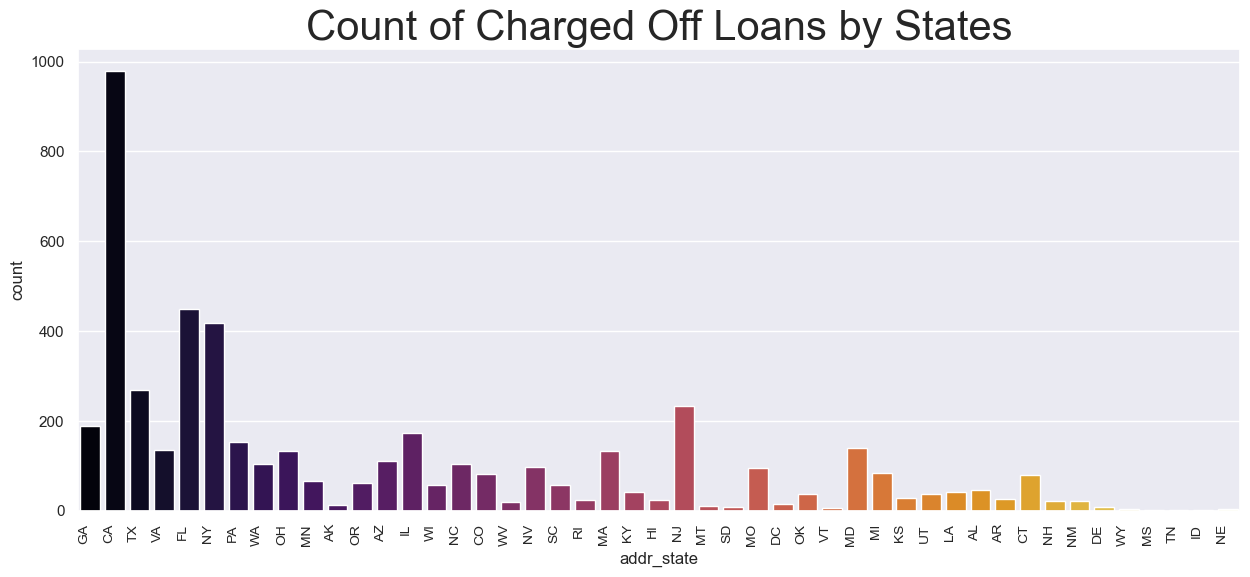

In [51]:
# Creating a visual that represnts the total counts of Charged Off in each State.

sns.countplot(x='addr_state', data=Data_New[Data_New['loan_status']=='Charged Off'],palette='inferno')
plt.title('Count of Charged Off Loans by States', fontsize=30)
plt.xticks(rotation=90, fontsize=10, ha='right')
plt.show()

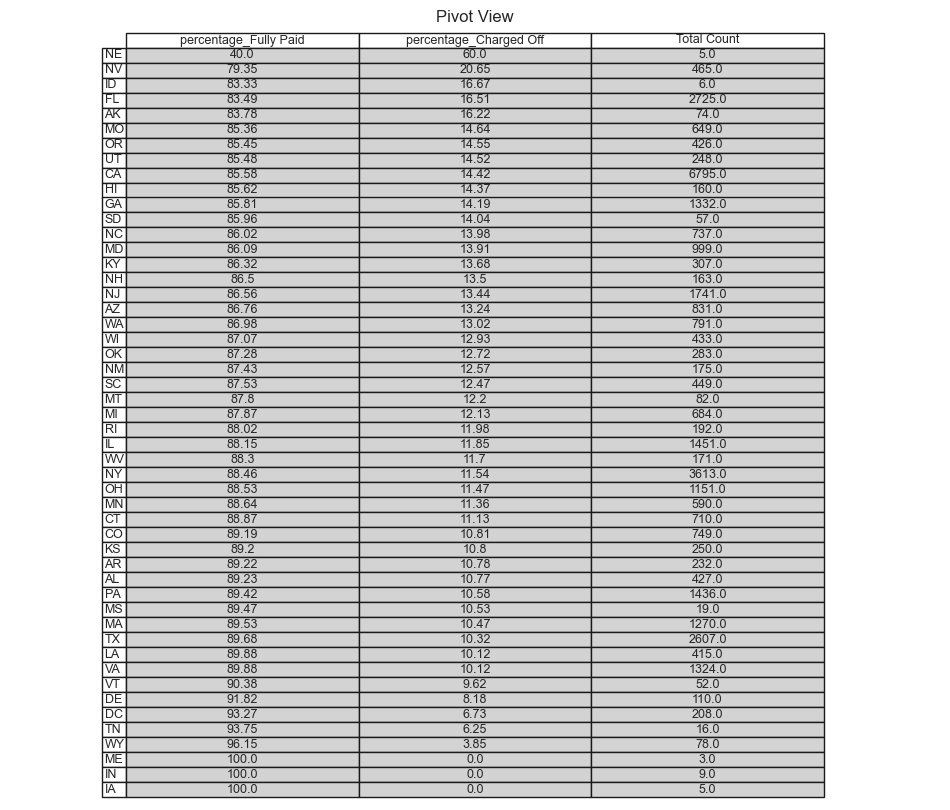

In [52]:
# Creating a pivot specially to check what percent of charged off are in each Grades & sorting it in descending order.

grouped_data = Data_New.groupby(['addr_state', 'loan_status']).size().reset_index(name='count')
total_counts = grouped_data.groupby('addr_state')['count'].sum().reset_index(name='total')
merged_data = pd.merge(grouped_data, total_counts, on='addr_state')
merged_data['percentage'] = (merged_data['count'] / merged_data['total']) * 100
result = merged_data.pivot(index='addr_state', columns='loan_status', values=['count', 'percentage']).fillna(0)
result.columns = ['_'.join(col).strip() for col in result.columns.values]
result['Total Count'] = result['count_Fully Paid'] + result['count_Charged Off']
pivot_table = result.pivot_table(index='addr_state',
                                 values=['percentage_Fully Paid', 'percentage_Charged Off', 'Total Count'],
                                 aggfunc='first')
pivot_table['percentage_Fully Paid'] = pivot_table['percentage_Fully Paid'].apply(lambda x: round(x, 2))
pivot_table['percentage_Charged Off'] = pivot_table['percentage_Charged Off'].apply(lambda x: round(x, 2))
pivot_table_sorted = pivot_table.sort_values(by='percentage_Charged Off', ascending=False)
pivot_table_sorted = pivot_table_sorted[['percentage_Fully Paid', 'percentage_Charged Off', 'Total Count']]
plt.figure(figsize=(12, 10))
plt.title('Pivot View')
plt.axis('off')  # Hide axis for cleaner display
table = plt.table(cellText=pivot_table_sorted.values,
                  colLabels=pivot_table_sorted.columns,
                  rowLabels=pivot_table_sorted.index,
                  cellLoc='center',  # Center-align text in cells
                  loc='center',
                  cellColours=[['lightgrey']*len(pivot_table_sorted.columns)]*len(pivot_table_sorted.index))

table.auto_set_font_size(False)
table.set_fontsize(9)  # Adjust font size
table.scale(0.75, 0.9) 

# ----------------------------------------------Insights-------------------------------------------------

## Charged Off:
### 1. While a visual analysis suggests State CA has the most loan defaults, followed by FL & NY, a deeper dive reveals a different story.
### 2. State NE borrowers have the highest percentage of defaults at 60% compared to the total loans issued in all the states but the number of total loan issued were only 5. Similarly, state NV has a high default percentage of 20.65% with a total of 465 loans issued.
### 3. States IA, IN & ME haven’t seen a single defaulting borrower over the period of 5 years on a total of 5, 9 & 3 loans issued.
### 4. States WY, TN & DC  loans have a higher default rate of 3.85%,6.25% & 6.73% compared to above States, with a total of roughly 78, 16 & 208 loans issued. But they still outperform other States.


# -----------------------------------------------THE END-----------------------------------------------